In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/TSLA_2010-06-29_2025-02-13.csv")

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3675,2025-02-06,373.029999,375.399994,363.179993,374.320007,374.320007,77918200
3676,2025-02-07,370.190002,380.549988,360.339996,361.619995,361.619995,70298300
3677,2025-02-10,356.209991,362.700012,350.510010,350.730011,350.730011,77514900
3678,2025-02-11,345.799988,349.369995,325.100006,328.500000,328.500000,118543400


In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
data["Date"] = pd.to_datetime(data["Date"],format = "%Y-%m-%d")

In [8]:
data = data.drop_duplicates()

In [9]:
data.reset_index(drop = True,inplace = True)

In [10]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3675,2025-02-06,373.029999,375.399994,363.179993,374.320007,374.320007,77918200
3676,2025-02-07,370.190002,380.549988,360.339996,361.619995,361.619995,70298300
3677,2025-02-10,356.209991,362.700012,350.510010,350.730011,350.730011,77514900
3678,2025-02-11,345.799988,349.369995,325.100006,328.500000,328.500000,118543400


In [11]:
data.isnull().values.any()

np.False_

# data analysis

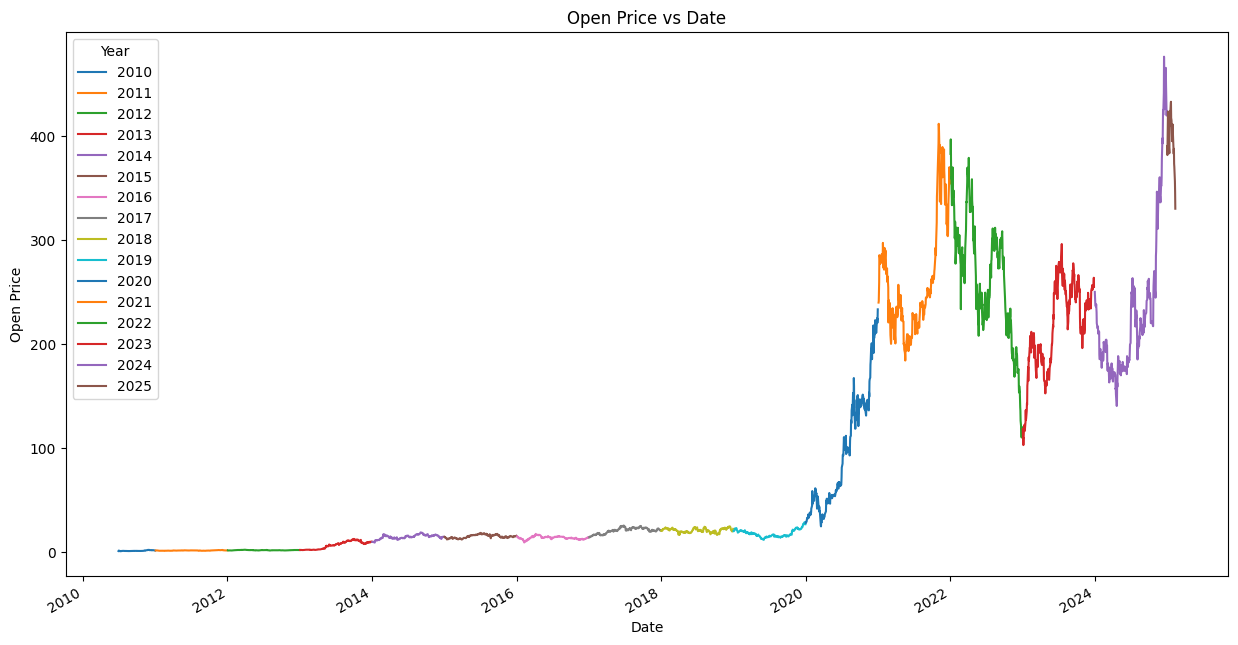

In [12]:
data["Date"] = pd.to_datetime(data["Date"])  # (if not already done)
data.set_index("Date", inplace=True)

# Now, group by year
plt.figure(figsize=(15,8))

for year, group in data.groupby(data.index.year):
    group["Open"].plot(label=year)

plt.legend(title="Year")  # title, not Title
plt.title("Open Price vs Date")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

Text(0, 0.5, 'Close Price')

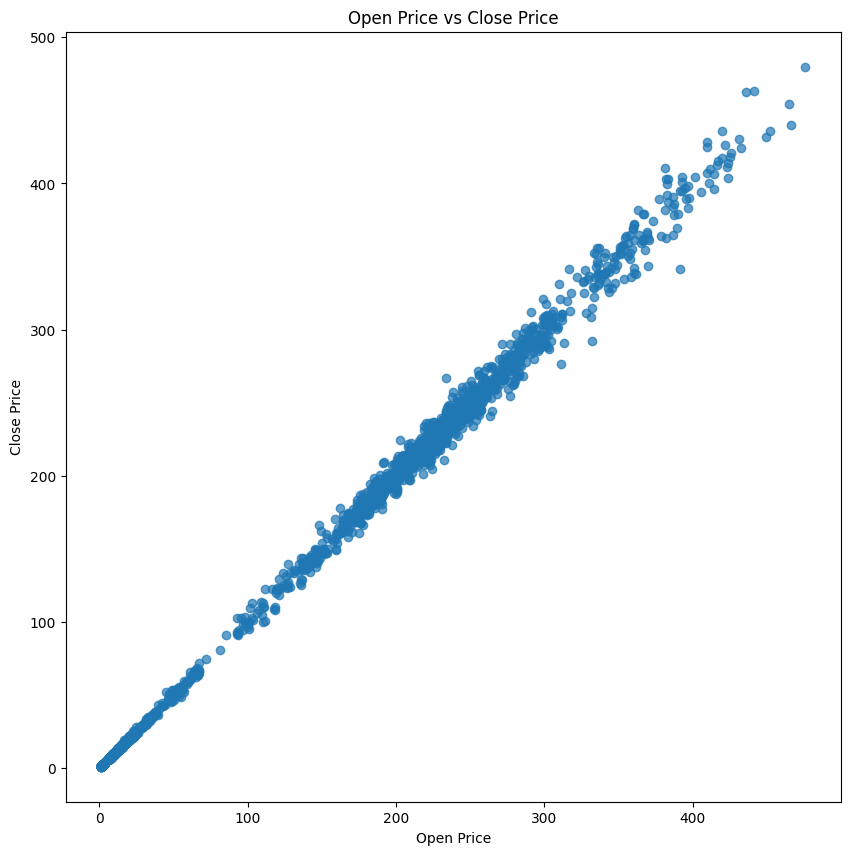

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(data["Open"],data["Close"],alpha = 0.7)
plt.title("Open Price vs Close Price")
plt.xlabel("Open Price")
plt.ylabel("Close Price")


Text(0, 0.5, 'High Price')

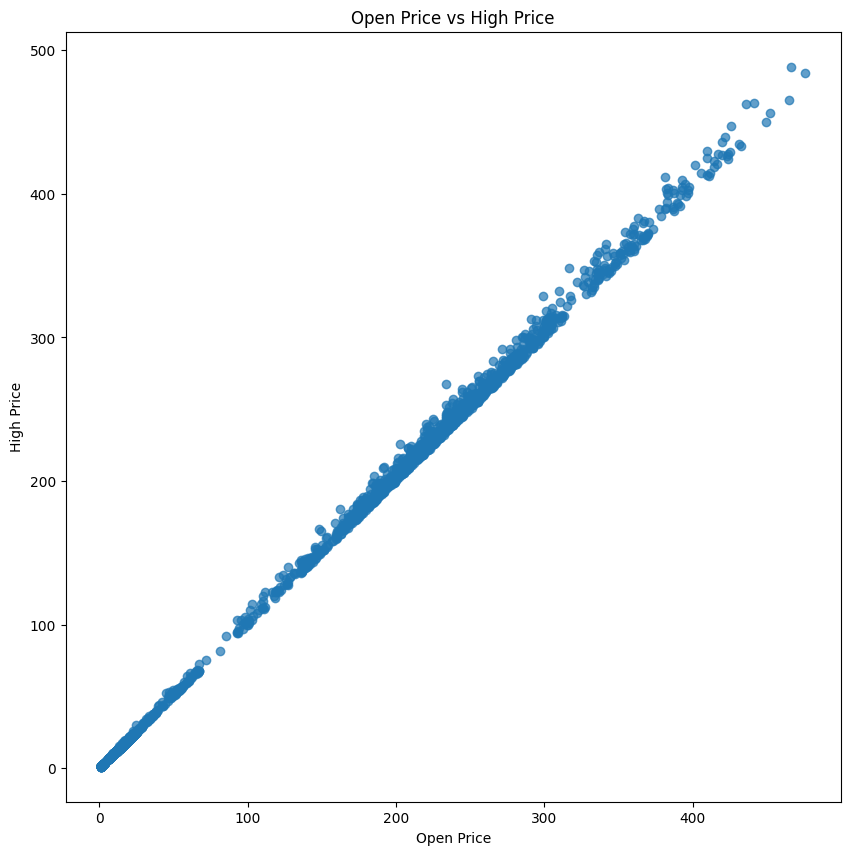

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(data["Open"],data["High"],alpha = 0.7)
plt.title("Open Price vs High Price")
plt.xlabel("Open Price")
plt.ylabel("High Price")

Text(0, 0.5, 'Low Price')

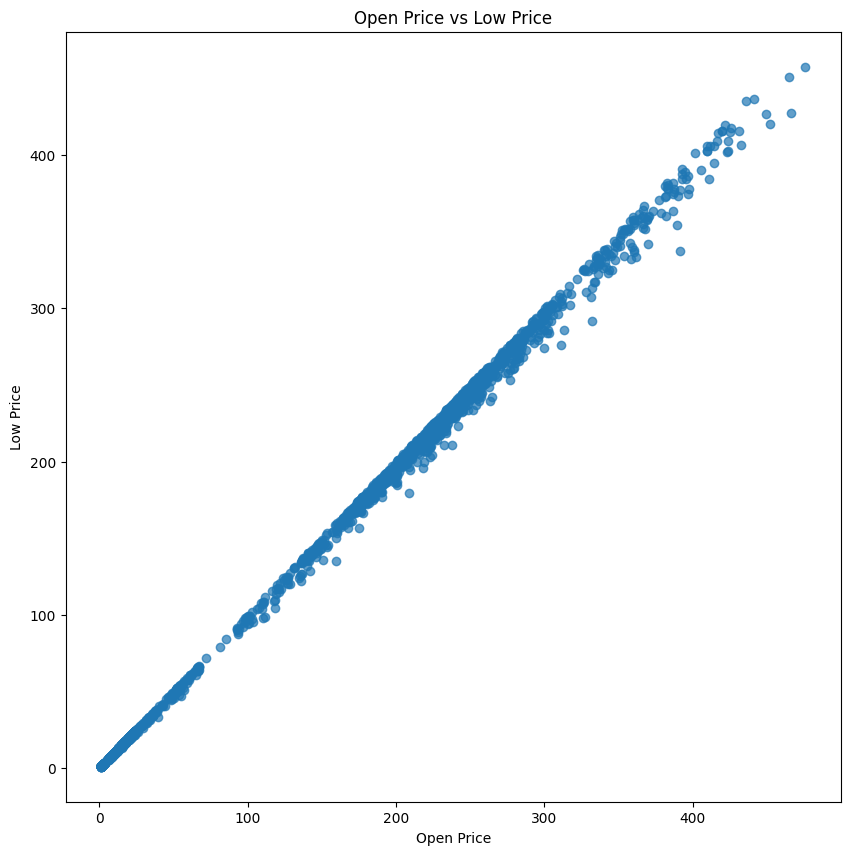

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(data["Open"],data["Low"],alpha = 0.7)
plt.title("Open Price vs Low Price")
plt.xlabel("Open Price")
plt.ylabel("Low Price")

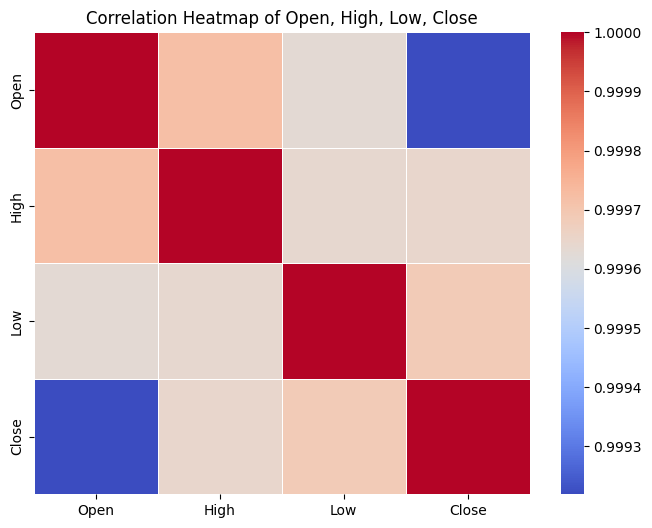

In [16]:
# Plotting Co-relation Heatmap
corr = data[['Open', 'High', 'Low', 'Close']].corr()

#Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Open, High, Low, Close')
plt.show()

# Feature Engineering

In [17]:
#Feature Extraction
# 1. High - Low range (intraday volatility)
data['HL_Range'] = data['High'] - data['Low']

# 2. Open - Close range (daily move)
data['OC_Range'] = data['Open'] - data['Close']

# 3. Average Price of the day
data['Avg_Price'] = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4

# 4. Percentage Change during the day
data['Pct_Change'] = ((data['Close'] - data['Open']) / data['Open']) * 100

# 5. Volatility Ratio
data['Volatility_Ratio'] = (data['High'] - data['Low']) / data['Close']

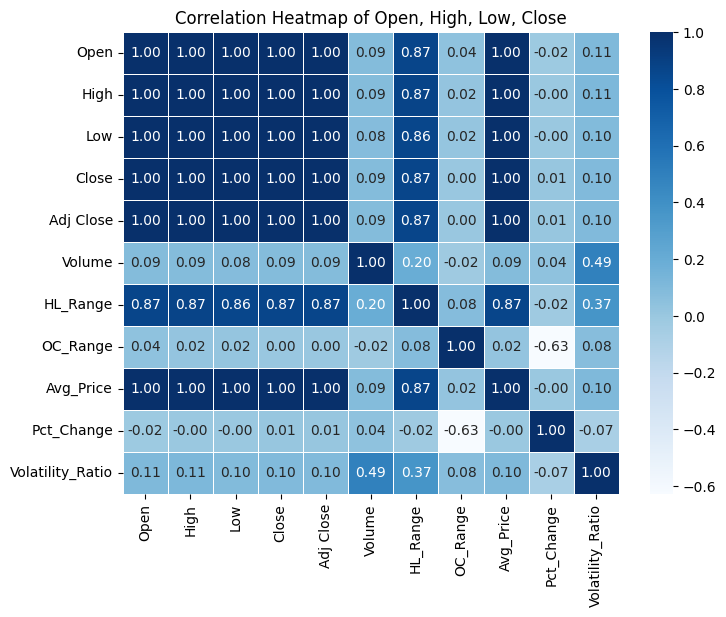

In [18]:
# Plotting Co-relation Heatmap
corr = data.corr()

#Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Open, High, Low, Close')
plt.show()

In [19]:
# Use RF to extract important features for training
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 1. Separate features and target
X = data.drop(['Close','Adj Close'], axis=1)
y = data['Close']

# 2. Fit Random Forest
model = RandomForestRegressor()
model.fit(X, y)

# 3. Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(5)

print(top_features)

Avg_Price     0.430969
Low           0.422346
High          0.144232
Open          0.002214
Pct_Change    0.000100
dtype: float64


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize
numerical_cols = ['Open', 'High', 'Low', 'Volume', 'HL_Range', 'OC_Range', 'Avg_Price', 'Pct_Change', 'Volatility_Ratio']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])



In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. Keep only top features
features = ['Avg_Price', 'Low', 'High', 'Open', 'Pct_Change']
X = data[features]
y = data['Close']

# 2. Set up Random Forest
rf = RandomForestRegressor()

# 3. Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 4. Grid Search with Cross Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X, y)

# 5. Best model
best_rf = grid_search.best_estimator_

# 6. Print best parameters
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [23]:
from sklearn.metrics import mean_squared_error
y_pred = best_rf.predict(X)

#  Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"RMSE: {rmse:.4f}")

RMSE: 0.5682
